# **Import Library Yang Dibutuhkan**

In [1]:
# untuk analisis dan memanipulasi data
import pandas as pd

# untuk operasi matematika
import numpy as np

# untuk membuat plot
import matplotlib.pyplot as plt
import seaborn as sns

# untuk encoding data label
from sklearn.preprocessing import LabelEncoder

# untuk K-Fold cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

# untuk algoritma metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

# untuk mengurutkan matric score
from collections import OrderedDict

#untuk TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# **Mounting GDrive**
digunakan untuk memberikan akses file pada gdrive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **Copy File**
setelah memiliki akses untuk membaca file pada gdrive kemudian file yang akan diolah akan di copy ke dalam directory google colab

In [3]:
!cp /content/gdrive/MyDrive/'Colab Notebooks'/'project'/dataa_clean.csv /content/

!ls

dataa_clean.csv  gdrive  sample_data


# **Read Dataset**

In [4]:
# Read data
df= pd.read_csv("dataa_clean.csv").drop(columns=['Unnamed: 0'])

# Cek data
display(df.head())

,text_clean,label_data
0,bagus cepat moga bantu mudah transaksi,positif
1,layan bagus moga tingkat,positif
2,bantu transfer,positif
3,mudah bayar online,positif
4,tolong baik abai pesan guna saran,negatif


In [5]:
#print (dataset.shape)
print (df.shape)

(2000, 2)


In [6]:
# Cek nilai Null pada data
print('Nilai Null:')
print (df.isnull().sum())
print("")


# Cek jumlah positive, negative 
positives = df[df['label_data'] == "positif"]
negatives = df[df['label_data'] == "negatif"]

print('Total positive      : {}'.format(len(positives)))
print('Total negative      : {}'.format(len(negatives)))
print('total data          : {}'.format(df.shape[0]))
print('')


Nilai Null:
text_clean    0
label_data    0
dtype: int64

Total positive      : 1214
Total negative      : 786
total data          : 2000



In [7]:
# Buat object baru untuk di analisa
X = df['text_clean']

# Encode Data Label agar bisa diproses algoritma
le = LabelEncoder()
le.fit(["positif", "negatif"])

print(list(le.classes_))
y = le.fit_transform(df['label_data'])

# Mengecek contoh hasil column baru
#print(X.shape)
#print(y.shape)
print(X[1])
print(y[0])
print(X.dtype)
print(y.dtype)

['negatif', 'positif']
layan bagus moga tingkat
1
object
int64


#**TF-IDF**

In [8]:
import time
# Melakukan proses TF-IDF
t0_tfidf = time.time()
tfidfconverter = TfidfVectorizer().fit(X)
X_vect = tfidfconverter.fit_transform(X).toarray()
t1_tfidf = time.time()
time_tfidf = t1_tfidf-t0_tfidf

print("TF-IDF time: %fs" % (time_tfidf))
X_vect.shape

TF-IDF time: 0.151046s


(2000, 623)

In [9]:
df_idf = pd.DataFrame(X_vect, columns=tfidfconverter.get_feature_names_out(), index=df['text_clean'])
df_idf.head()

,abai,adakan,admin,administrasi,adu,agam,agen,ain,ajar,aju,...,video,vocer,voucer,wajah,wajib,waspada,wifi,ya,youtube,zaman
text_clean,,,,,,,,,,,,,,,,,,,,,
bagus cepat moga bantu mudah transaksi,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
layan bagus moga tingkat,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bantu transfer,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mudah bayar online,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tolong baik abai pesan guna saran,0.552826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_idf.to_csv('Hasil TF-IDF.csv',index=True)

# **Visualisasi**

## **Wordcloud**
Menampilkan kata-kata yang sering muncul pada ulasan

In [10]:
def split_word(teks):
    list_teks = []
    for txt in teks.split(" "):
        list_teks.append(txt)
    return list_teks

In [11]:
def wordcloud(data):
  from wordcloud import WordCloud
  list_words=''
  for review in data:
    for word in review:
        list_words += ' '+(word)
        
  wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
  fig, ax = plt.subplots(figsize = (8, 6))
  ax.set_title('Word Cloud Ulasan', fontsize = 18)
  ax.grid(False)
  ax.imshow((wordcloud))
  fig.tight_layout(pad=0)
  ax.axis('off')
  plt.show()

In [12]:
data_wc = df['text_clean'].apply(split_word)

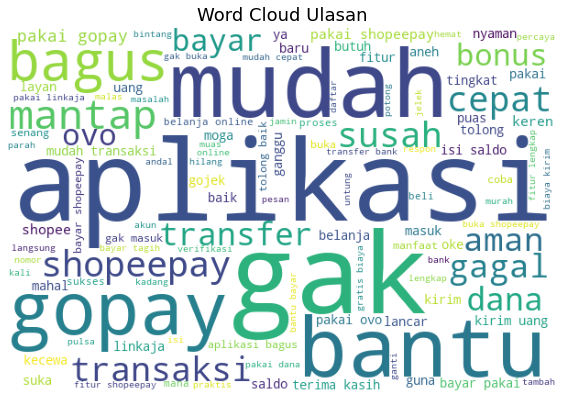

In [13]:
wordcloud(data_wc)

## Word Cloud Negative Vs Positive

(-0.5, 799.5, 599.5, -0.5)

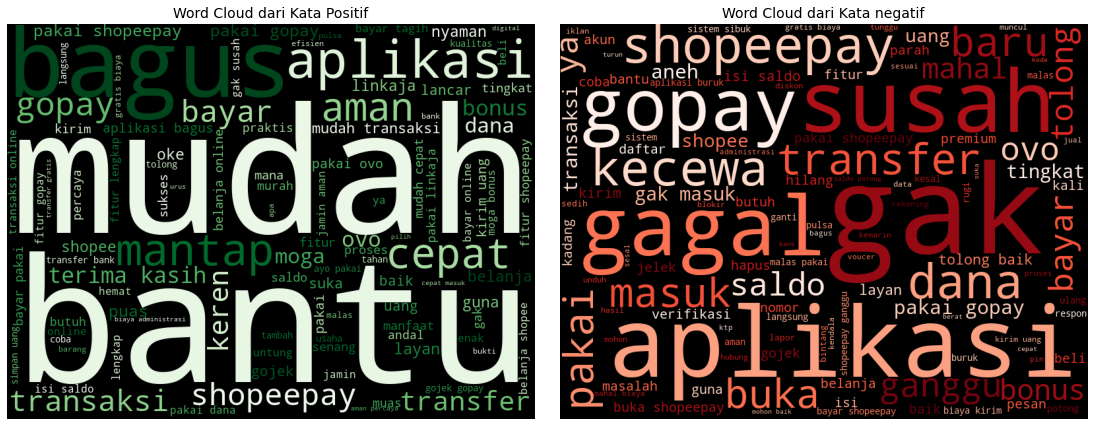

In [14]:
from wordcloud import WordCloud
positif_review = df[df['label_data'] == 'positif']
positif_words = positif_review['text_clean'].apply(split_word)

fig, ax = plt.subplots(1,2, figsize = (15, 10))
list_words_postive=''
for row_word in positif_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positif = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud dari Kata Positif', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positif))
fig.tight_layout(pad=0)
ax[0].axis('off')

negatif_review = df[df['label_data'] == 'negatif']
negatif_words = negatif_review['text_clean'].apply(split_word)

list_words_negatif=''
for row_word in negatif_words:
    for word in row_word:
        list_words_negatif += ' '+(word)
wordcloud_negatif = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negatif)
ax[1].set_title('Word Cloud dari Kata negatif', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negatif))
fig.tight_layout(pad=0)
ax[1].axis('off')


##**Pie Plot**
Mengetahui jumlah label positif dan negatif dengan diagram lingkaran

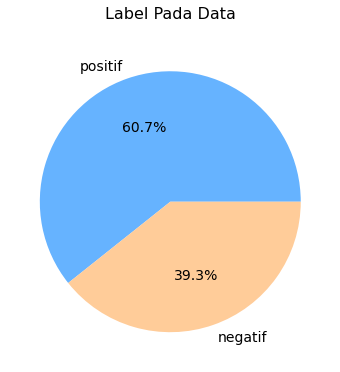

In [15]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['label_data'].value_counts()]
labels = list(df['label_data'].value_counts().index)
explode = (0, 0)
colors = ['#66b3ff', '#ffcc99']
ax.pie(x = sizes, labels = labels, colors=colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Label Pada Data', fontsize = 16, pad = 20)
plt.show()

**Penambahan SMOTE**

In [16]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=101,k_neighbors=5)
ros.fit(X_vect, y)
X_resampled, y_resampled = ros.fit_resample(X_vect, y)

In [17]:
df_smote = pd.DataFrame({'label_data':y_resampled})
label = { 1:'positif',0:'negatif'}
df_smote['label'] = [label[item] for item in df_smote.label_data]

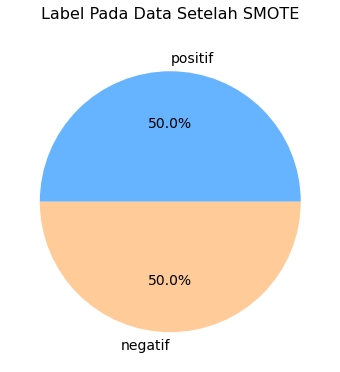

In [18]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df_smote['label'].value_counts()]
labels = list(df_smote['label'].value_counts().index)
explode = (0, 0)
colors = ['#66b3ff', '#ffcc99']
ax.pie(x = sizes, labels = labels, colors=colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Label Pada Data Setelah SMOTE', fontsize = 16, pad = 20)
plt.show()

#**Function Pendukung**

Buat Function Confusion Matrix

In [19]:
# Plot Confusion Matrix
def conf_matrix(cm):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Confusion Matrix - Test Data Positive dan Negative')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

Buat Function K-Fold SVM dengan SMOTE

In [20]:
def kfoldcv_SMOTE(classifier, X, Y, folds):

    # Penggunaan SMOTEE
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, cross_validate
    smote = SMOTE(k_neighbors=5,random_state=101)
    Total_Y0 = sum(Y == 0)
    Total_Y1 = sum(Y == 1)
    X, Y = smote.fit_resample(X, Y)
    y_pred = cross_val_predict(classifier, X, Y, cv=folds)
    cm = confusion_matrix(Y, y_pred)
    
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    Totaldata = TN+FP+FN+TP
    Accuracy = ((TP + TN) / (TP + TN + FN + FP))
    Precision = (TP / (TP + FP))
    Recall = (TP / (TP + FN))
    F1 = (2 * (Precision * Recall) / (Precision + Recall))

    
    print("Confusion Matrix - Hitung Manual")
    print("TN %s FP %s" % (TN,FP))
    print("FN %s TP %s" % (FN,TP))
    print("Total data: %s" % (Totaldata))
    print("Accuracy  : %0.3f %%" % (Accuracy*100))
    print("Precision : %0.3f %%" % (Precision*100))
    print("Recall    : %0.3f %%" % (Recall*100))
    print("F1-Score  : %0.3f %%" % (F1*100))
    conf_matrix(cm)
  
    print("")
    print('Total Data Negative sebelum SMOTE ',Total_Y0)
    print('Total Data Positive sebelum SMOTE ',Total_Y1)
    print('Total Data sebelum SMOTE ',Total_Y0+Total_Y1)
    print("")
    print('Total Data Prediksi Negative ',sum(y_pred == 0))
    print('Total Data Prediksi Positive ',sum(y_pred == 1))
    print('Total Data Negative sesudah SMOTE ',sum(Y == 0))
    print('Total Data Positive sesudah SMOTE ',sum(Y == 1))
    print('Total Data sesudah SMOTE ',len(Y))
    print("")


Buat Function K-Fold SVM

In [21]:
def kfoldcv(classifier, X, Y, folds):

    from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, cross_validate
    Total_Y0 = sum(Y == 0)
    Total_Y1 = sum(Y == 1)
    y_pred = cross_val_predict(classifier, X, Y, cv=folds)
    cm = confusion_matrix(Y, y_pred)
    
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    Totaldata = TN+FP+FN+TP
    Accuracy = ((TP + TN) / (TP + TN + FN + FP))
    Precision = (TP / (TP + FP))
    Recall = (TP / (TP + FN))
    F1 = (2 * (Precision * Recall) / (Precision + Recall))

    
    print("Confusion Matrix - Hitung Manual")
    print("TN %s FP %s" % (TN,FP))
    print("FN %s TP %s" % (FN,TP))
    print("Accuracy  : %0.3f %%" % (Accuracy*100))
    print("Precision : %0.3f %%" % (Precision*100))
    print("Recall    : %0.3f %%" % (Recall*100))
    print("F1-Score  : %0.3f %%" % (F1*100))
    conf_matrix(cm)
  
    print("")
    print('Total Data Negative sebelum SMOTE ',Total_Y0)
    print('Total Data Positive sebelum SMOTE ',Total_Y1)
    print('Total Data sebelum SMOTE ',Total_Y0+Total_Y1)
    print("")
    print('Total Data Prediksi Negative ',sum(y_pred == 0))
    print('Total Data Prediksi Positive ',sum(y_pred == 1))
    print("")


Buat Function Algoritma SVM

In [22]:
from sklearn import model_selection, svm

def algo_svm():
  clr_svm = svm.SVC()
  return clr_svm

#**Hyperparameter Tuning**

In [23]:
from sklearn.model_selection import GridSearchCV
def tuningSVM(model, X, Y):
  params_grid_SVC = [{'C': [0.1,1,10,100], 'kernel': ['linear']}]
  optimal_parameters = GridSearchCV(estimator =model, param_grid = params_grid_SVC, cv=5, scoring='accuracy')
  optimum = optimal_parameters.fit(X, Y)
  #print(optimum.cv_results_.keys())
  for i in ['mean_test_score', 'params', 'rank_test_score']:
      print(i," : ",optimum.cv_results_[i])
  print(optimum.best_params_)


In [24]:
tuningSVM(model=algo_svm(), X=X_vect, Y=y)

mean_test_score  :  [0.953  0.96   0.9525 0.9395]
params  :  [{'C': 0.1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}, {'C': 100, 'kernel': 'linear'}]
rank_test_score  :  [2 1 3 4]
{'C': 1, 'kernel': 'linear'}


#**Modelling**

## **Tanpa SMOTE**

In [25]:
def metode_svm():
  from sklearn import svm
  clf_svm = svm.SVC(kernel='linear', C=1)
  return clf_svm

Algoritma Support Vector Machine Tanpa SMOTE
Confusion Matrix - Hitung Manual
TN 758 FP 28
FN 52 TP 1162
Accuracy  : 96.000 %
Precision : 97.647 %
Recall    : 95.717 %
F1-Score  : 96.672 %


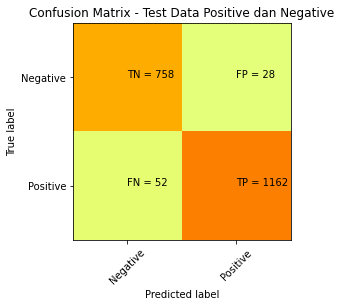


Total Data Negative sebelum SMOTE  786
Total Data Positive sebelum SMOTE  1214
Total Data sebelum SMOTE  2000

Total Data Prediksi Negative  810
Total Data Prediksi Positive  1190

___________________________________________________________


In [26]:
print("Algoritma Support Vector Machine Tanpa SMOTE")
kfoldcv(classifier=metode_svm(), X=X_vect, Y=y, folds=5)
print('___________________________________________________________')

In [28]:
def tampil_data(classifier, X, Y, folds):

    # Penggunaan SMOTEE
    y_pred = cross_val_predict(classifier, X, Y, cv=folds)
    cm = confusion_matrix(Y, y_pred)
   
    # Cek prediction text SVM
    df_pred = pd.DataFrame()
    df_pred['Teks'] = X_vectnew = tfidfconverter.inverse_transform(X)
    df_pred['Label'] = le.inverse_transform(Y)
    df_pred['SVM Sentiment'] = le.inverse_transform(y_pred)
    temp=[]
    for i in range(len(Y)):
      if Y[i] == y_pred[i]:
        temp.append('Tepat')
      else:
        temp.append('Tidak Tepat') 

    df_pred['Validation']= temp 
    print(df_pred)
    df_pred.to_csv('hasil_klasifikasi_svm5.csv', encoding='utf-8')

In [29]:
print("Hasil")
tampil_data(classifier=metode_svm(), X=X_vect, Y=y, folds=5)
print('___________________________________________________________')

Hasil
                                                   Teks    Label  \
0         [bagus, bantu, cepat, moga, mudah, transaksi]  positif   
1                         [bagus, layan, moga, tingkat]  positif   
2                                     [bantu, transfer]  positif   
3                                [bayar, mudah, online]  positif   
4              [abai, baik, guna, pesan, saran, tolong]  negatif   
...                                                 ...      ...   
1995       [bagus, fitur, lengkap, mantap, ovo, sukses]  positif   
1996           [bayar, cepat, mudah, proses, transaksi]  positif   
1997  [cepat, gagal, kali, kembali, langsung, malam,...  negatif   
1998                  [isi, kemarin, ovo, saldo, sesal]  negatif   
1999  [aplikasi, kasih, mana, mudah, ovo, suka, teri...  positif   

     SVM Sentiment Validation  
0          positif      Tepat  
1          positif      Tepat  
2          positif      Tepat  
3          positif      Tepat  
4          negati

## **Implementasi Model Untuk Menentukan Sentimen Positif / Negatif Pada Tweet**

In [30]:
df_opini = pd.DataFrame({'Opini':['aplikasi sulit akses gagal','verifikasi susah aplikasi jelek','bantu transaksi murah mudah cepat','kirim uang transaksi mudah cepat']})

In [31]:
# untuk fungsi regex
import re

# untuk mengambil punctuation data
import string

# untuk analisis dan memanipulasi data
import pandas as pd

# Untuk encoding label
from sklearn.preprocessing import LabelEncoder

# Untuk tokenize 
from nltk.tokenize import word_tokenize

# Untuk stemming, lemmatize dan stopwords
from nltk.stem import PorterStemmer

# Untuk proses TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Untuk proses SMOTE
from imblearn.over_sampling import SMOTE

# Untuk export model
import pickle

# Read Dataset
df

# Encode Data Label
le = LabelEncoder()
le.fit(['positif', 'negatif'])
y = le.transform(df['label_data'])

# Melakukan proses TF-IDF
tfidfconverter = TfidfVectorizer()
X_vect = tfidfconverter.fit_transform(df['text_clean']).toarray()

# Algoritma SVM
clr =  metode_svm()
clr.fit(X_vect,y)

pickle.dump(clr, open('model_tanpasmote_svm.pkl','wb'))
model = pickle.load( open('model_tanpasmote_svm.pkl','rb'))
print("predict")
opini = tfidfconverter.transform(df_opini['Opini']).toarray()
hasil = model.predict(opini)
for i in hasil:
  if i == 1:
    print('positif')
  else:
    print('negatif')

predict
negatif
negatif
positif
positif


In [32]:
model = pickle.load( open('model_tanpasmote_svm.pkl','rb'))
print("predict")
opini = tfidfconverter.transform(df_opini['Opini']).toarray()
hasil = model.predict(opini)
for i in hasil:
  if i == 1:
    print('positif')
  else:
    print('negatif')

predict
negatif
negatif
positif
positif


## **Dengan SMOTE**

In [33]:
def metode_svm():
  from sklearn import svm
  clf_svm = svm.SVC(kernel='linear', C=1)
  return clf_svm

Algoritma Support Vector Machine + SMOTE
Confusion Matrix - Hitung Manual
TN 1197 FP 17
FN 59 TP 1155
Total data: 2428
Accuracy  : 96.870 %
Precision : 98.549 %
Recall    : 95.140 %
F1-Score  : 96.815 %


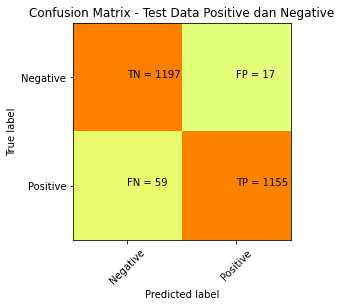


Total Data Negative sebelum SMOTE  786
Total Data Positive sebelum SMOTE  1214
Total Data sebelum SMOTE  2000

Total Data Prediksi Negative  1256
Total Data Prediksi Positive  1172
Total Data Negative sesudah SMOTE  1214
Total Data Positive sesudah SMOTE  1214
Total Data sesudah SMOTE  2428

___________________________________________________________


In [34]:
print("Algoritma Support Vector Machine + SMOTE")
kfoldcv_SMOTE(classifier=metode_svm(), X=X_vect, Y=y, folds=5)
print('___________________________________________________________')

In [35]:
def tampil_data(classifier, X, Y, folds):

    # Penggunaan SMOTEE
    smote = SMOTE(k_neighbors=5)
    X, Y = smote.fit_resample(X, Y)
    y_pred = cross_val_predict(classifier, X, Y, cv=folds)
    cm = confusion_matrix(Y, y_pred)
   
    # Cek prediction text SVM
    df_pred = pd.DataFrame()
    df_pred['Teks'] = X_vectnew = tfidfconverter.inverse_transform(X)
    df_pred['Label'] = le.inverse_transform(Y)
    df_pred['SVM Sentiment'] = le.inverse_transform(y_pred)
    temp=[]
    for i in range(len(Y)):
      if Y[i] == y_pred[i]:
        temp.append('Tepat')
      else:
        temp.append('Tidak Tepat') 

    df_pred['Validation']= temp 
    print(df_pred)
    df_pred.to_csv('hasil_klasifikasi_svm_smote5.csv', sep= ';' , encoding='utf-8')

In [36]:
print("Hasil")
tampil_data(classifier=metode_svm(), X=X_vect, Y=y, folds=5)
print('___________________________________________________________')

Hasil
                                                   Teks    Label  \
0         [bagus, bantu, cepat, moga, mudah, transaksi]  positif   
1                         [bagus, layan, moga, tingkat]  positif   
2                                     [bantu, transfer]  positif   
3                                [bayar, mudah, online]  positif   
4              [abai, baik, guna, pesan, saran, tolong]  negatif   
...                                                 ...      ...   
2423   [buruk, kali, kecewa, linkaja, pakai, transaksi]  negatif   
2424  [aplikasi, baik, buka, buruk, dana, gak, kemar...  negatif   
2425  [bayar, bonus, gopay, mahal, pakai, pelit, sho...  negatif   
2426  [barang, bayar, bonus, cari, gak, harga, mahal...  negatif   
2427  [bantu, baru, bonus, cepat, gak, jelek, penuh,...  negatif   

     SVM Sentiment Validation  
0          positif      Tepat  
1          positif      Tepat  
2          positif      Tepat  
3          positif      Tepat  
4          negati

## **Implementasi Model Untuk Menentukan Sentimen Positif / Negatif Pada Tweet**

In [37]:
df_opini = pd.DataFrame({'Opini':['aplikasi sulit akses gagal','verifikasi susah aplikasi jelek','bantu transaksi murah mudah cepat','kirim uang transaksi mudah cepat']})

In [38]:
# untuk fungsi regex
import re

# untuk mengambil punctuation data
import string

# untuk analisis dan memanipulasi data
import pandas as pd

# Untuk encoding label
from sklearn.preprocessing import LabelEncoder

# Untuk tokenize 
from nltk.tokenize import word_tokenize

# Untuk stemming, lemmatize dan stopwords
from nltk.stem import PorterStemmer

# Untuk proses TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Untuk proses SMOTE
from imblearn.over_sampling import SMOTE

# Untuk export model
import pickle

# Read Dataset
df

# Encode Data Label
le = LabelEncoder()
le.fit(['positif', 'negatif'])
y = le.transform(df['label_data'])

# Melakukan proses TF-IDF
tfidfconverter = TfidfVectorizer()
X_vect = tfidfconverter.fit_transform(df['text_clean']).toarray()

# Penggunaan SMOTE
smote = SMOTE(k_neighbors=5)
X_vect,y = smote.fit_resample(X_vect,y)

# Algoritma SVM
clr =  metode_svm()
clr.fit(X_vect,y)

pickle.dump(clr, open('modelsvm.pkl','wb'))
model = pickle.load( open('modelsvm.pkl','rb'))
print("predict")
opini = tfidfconverter.transform(df_opini['Opini']).toarray()
hasil = model.predict(opini)
for i in hasil:
  if i == 1:
    print('positif')
  else:
    print('negatif')

predict
negatif
negatif
positif
positif


In [39]:
model = pickle.load( open('modelsvm.pkl','rb'))
print("predict")
opini = tfidfconverter.transform(df_opini['Opini']).toarray()
hasil = model.predict(opini)
for i in hasil:
  if i == 1:
    print('positif')
  else:
    print('negatif')

predict
negatif
negatif
positif
positif
